In [22]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy
import math
import scipy as sp

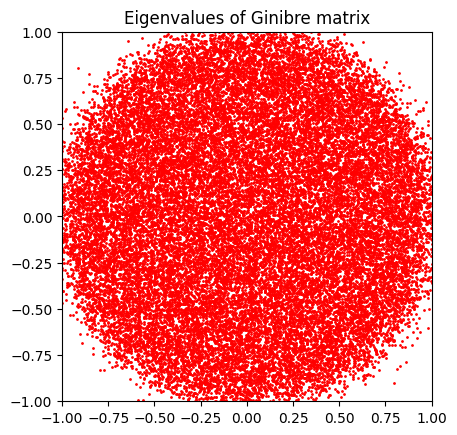

In [81]:
gen = rd.default_rng()
N = 64
mu = 0.0
sigma = 1.0/np.sqrt(2*N)

def obtainGinibreEig(N,mu,sigma):
    mat = gen.normal(mu,sigma, (N,N)) + gen.normal(mu,sigma,(N,N))*complex(0,1)
    #print(mat)

    eigenvalues, _= np.linalg.eig(mat)
    #print(eigenvalues)


    plt.xlim(-1.0,1.0)
    plt.ylim(-1.0,1.0)
    return eigenvalues

eigenvalues = []
for i in range(500):
    eigenvalues.append(obtainGinibreEig(N,mu,sigma))

#print(eigenvalues)
values = np.append([], eigenvalues)
'''print(values)
print(values.real)
print(values.imag)
'''
plt.gca().set_aspect('equal')
plt.scatter(values.real, values.imag, s = 1,c="red")
plt.title("Eigenvalues of Ginibre matrix")
plt.show()

In [4]:
def pdf_ginoe(N,k,Lr,Lc):
    def prod_gamma(N):
        prod = 1
        for i in range(1,N+1):
            prod *= scipy.special.gamma(i/2)
        return prod
    def sum_real(Lr):
        s = 0
        for i in Lr:
            s += i**2
        return s/2
    def sum_complexe(Lc):
        s = 0
        for i in Lc:
            s += i.imag**2 - i.real**2
            return s
    def prod_erfc(Lc):
        p = 1
        for i in Lc:
            p *= scipy.special.erfc(np.sqrt(2)*i.imag)
        return p
    def coeff():
        return 2**(N(N+1)/4)*prod_gamma(N)*math.factorial(k)*math.factorial((N-k)/2)/2**((N-k)/2)
    Lc_conj = []
    for i in Lc:
        Lc_conj.append(i.real - i.imag)
    L = Lr + Lc + Lc_conj
    Dvand = np.linalg.det(np.vander(L))
    return np.exp(-sum_real(Lr))*np.exp(sum_complexe(Lc))*prod_erfc(Lc)*Dvand/coeff



    

Text(0.5, 1.0, 'Partie réelle des valeurs propres')

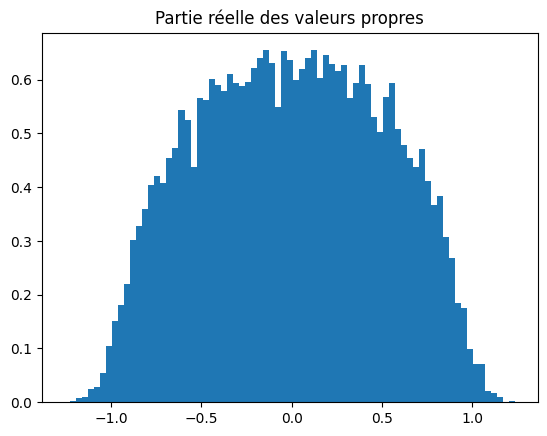

In [18]:
valuesUP = values.real
plt.hist(valuesUP, 75, density = True)
plt.title('Partie réelle des valeurs propres')

[0.97569714 0.69914772 0.79664987 ... 0.33474631 0.26454749 0.03805788]


Text(0.5, 1.0, 'Parties imaginaires positives des valeurs propres')

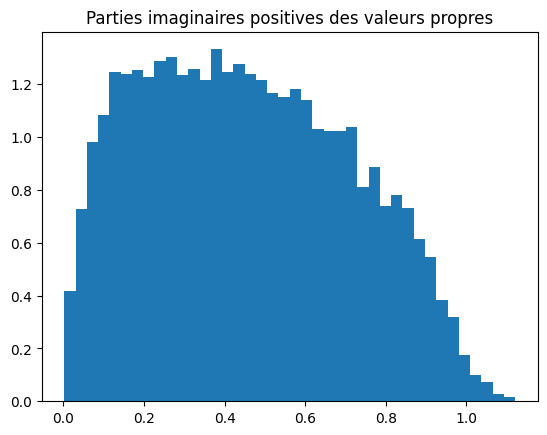

In [75]:
valuesUP = values[values.imag>0].imag
print(valuesUP)
plt.hist(valuesUP, 40, density = True);#or valuesUP
# essayer de comparer avec une loi gamma ou de Rayleigh
plt.title('Parties imaginaires positives des valeurs propres')

In [6]:
def gamma(x,a):
    return x**(a-1)*np.exp(-x)/scipy.special.gamma(a)

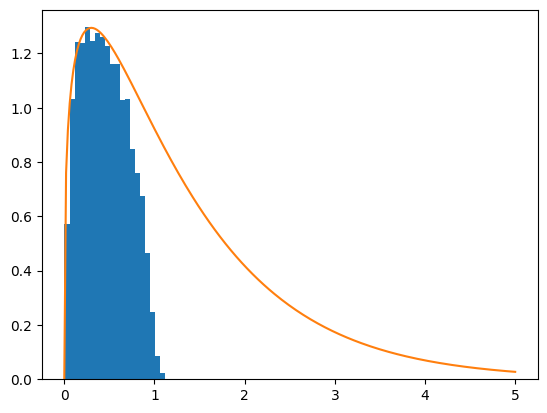

In [13]:
X = np.linspace(0,5,250)
Y = [gamma(x, 1.3)*2.25 for x in X]
#print(Y)
plt.hist(valuesUP, 20, density = True)
plt.plot(X,Y)

In [27]:
def expSeries(n, z):
    zPowK=1.0
    res= 0.0
    factK = 1
    for k in range(n+1):
        res+= zPowK/factK
        zPowK*=z
        factK*=(k+1)
    return res


def rho(N,x,y):
    return np.sqrt(2.0/np.pi)*y*np.exp(y**2-x**2)*sp.special.erfc(np.sqrt(2)*y)*expSeries(N-2, x**2+y**2)

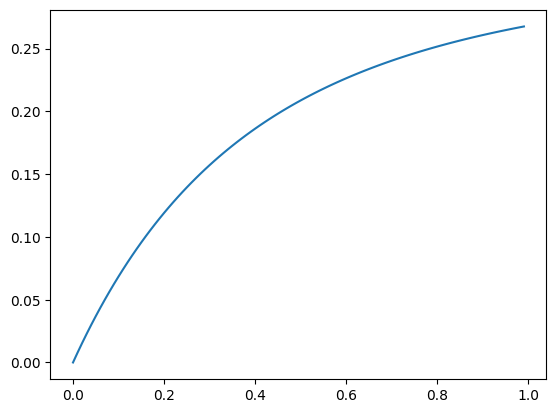

In [36]:
Y =[0.01*k for k in range(100)]
R = [rho(100,0,y) for y in Y]
print(rho(100, ))
plt.plot(Y,R)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99]


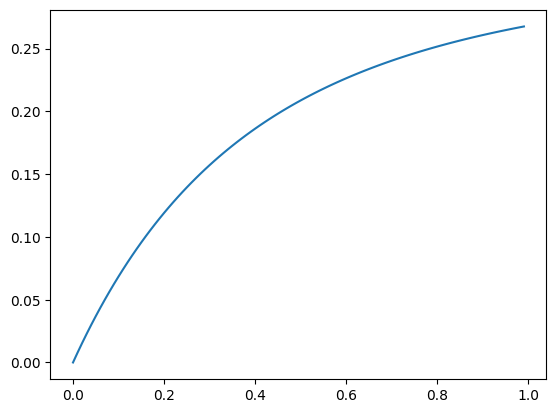

In [54]:
Y =[0.01*k for k in range(100)]
R = [rho(100, 0,y) for y in Y]
print(Y)
plt.plot(Y,R)

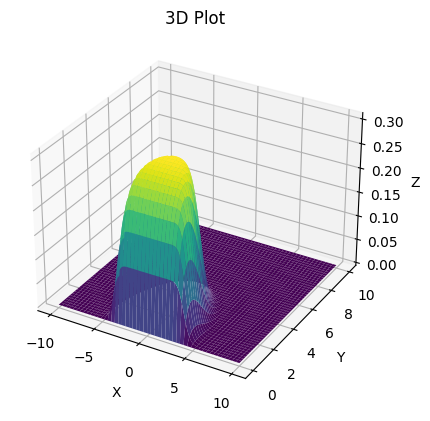

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

def expSeries(n, z):
    zPowK = 1.0
    res = 0.0
    factK = 1
    for k in range(n + 1):
        res += zPowK / factK
        zPowK *= z
        factK *= (k + 1)
    return res

def rho(N, x, y):
    return np.sqrt(2.0 / np.pi) * y * np.exp(y**2 - x**2) * sp.special.erfc(np.sqrt(2) * y) * expSeries(N - 2, x**2 + y**2)

y, x = np.meshgrid(np.linspace(0, 10, 500), np.linspace(-10, 10, 1000))
z = rho(16, x, y)

z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_title('3D Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


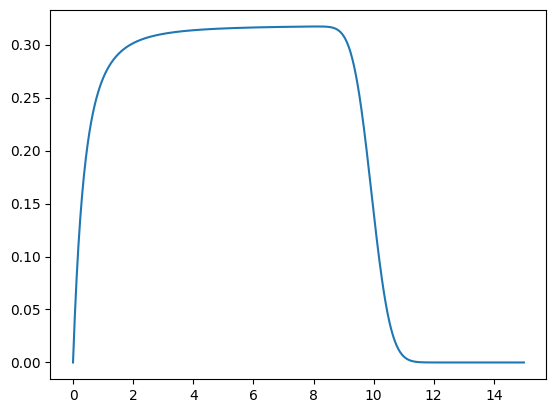

In [74]:
Y = np.linspace(0, 15, 500)
R = [rho(100,0,y) for y in Y]
plt.plot(Y,R)

Text(0.5, 1.0, 'Wigner semicircle distribution (R=2)')

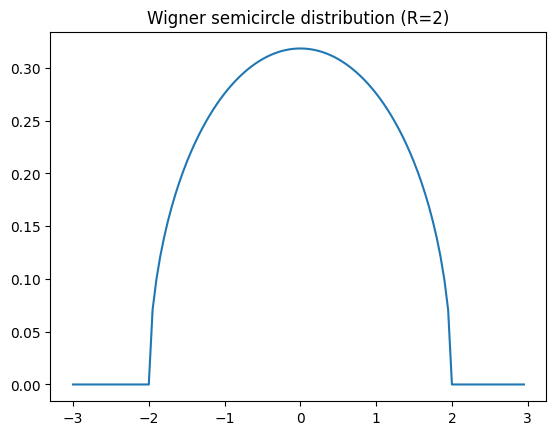

In [79]:
def semicercle(x):
    if np.abs(x)>2: 
        return 0
    else:
        return np.sqrt(4 - x**2)/(2*np.pi)
    
X = np.arange(-3,3,0.05)
Y = [semicercle(x) for x in X]
plt.plot(X,Y)
plt.title('Wigner semicircle distribution (R=2)')